In [2]:
#Question 1:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

#Loading data
X = np.loadtxt('FeaturesX.csv')
Y0 = np.loadtxt('LabelsY.csv')

#Encoding data as One Hot vector representation
#Manually
Y2 = Y0-1
Y2 = np.eye(3)[Y2.astype('int')]
Y2 = Y2.T

#Using sklearn
encoder = OneHotEncoder(categories='auto')
Y = encoder.fit_transform(Y0.reshape(-1,1)).toarray()
Y = Y.T

#Adding bias term
bias = np.ones(800)
X = np.vstack((X, bias))

# model specifications
Ni=8; Nh=5; No=3;

#parameter and array initialization
Ntrials=1000
wh=np.random.randn(Nh,Ni); dwh=np.zeros(wh.shape) 
wo=np.random.randn(No,Nh); dwo=np.zeros(wo.shape) 
error=np.array([])

for trial in range(Ntrials):     
    h=1/(1+np.exp(-wh@X)) #hidden activation for all pattern
    y=1/(1+np.exp(-wo@h)) #output for all pattern
    
    do=y*(1-y)*(Y-y)  # delta output
    dh=h*(1-h)*(wo.transpose()@do)  # delta backpropagated  
    
    # update weights with momentum
    dwo=0.9999*dwo+do@h.T
    wo=wo+0.0001*dwo
    dwh=0.9999*dwh+dh@X.T
    wh=wh+0.0001*dwh
    
    error=np.append(error,np.sum(abs(Y-y))/800)

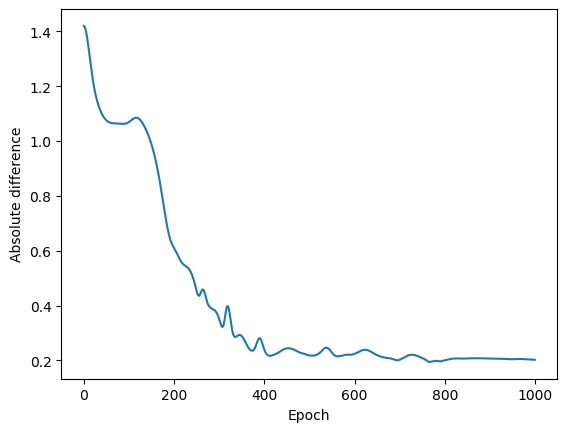

In [3]:
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt

set_matplotlib_formats('pdf', 'png')

plt.xlabel("Epoch")
plt.ylabel("Absolute difference")
plt.plot(error)
plt.show()

Train on 700 samples, validate on 100 samples
Epoch 1/10
700/700 [==============================] - 3s 5ms/sample - loss: 1.3224 - accuracy: 0.4229 - val_loss: 1.2244 - val_accuracy: 0.4600
Epoch 2/10
700/700 [==============================] - 0s 118us/sample - loss: 1.0923 - accuracy: 0.5057 - val_loss: 0.9855 - val_accuracy: 0.4600
Epoch 3/10
700/700 [==============================] - 0s 98us/sample - loss: 0.8627 - accuracy: 0.5657 - val_loss: 0.7336 - val_accuracy: 0.8600
Epoch 4/10
700/700 [==============================] - 0s 98us/sample - loss: 0.7020 - accuracy: 0.7186 - val_loss: 0.6035 - val_accuracy: 0.8000
Epoch 5/10
700/700 [==============================] - 0s 103us/sample - loss: 0.5114 - accuracy: 0.8229 - val_loss: 0.4086 - val_accuracy: 0.8400
Epoch 6/10
700/700 [==============================] - 0s 101us/sample - loss: 0.4044 - accuracy: 0.8829 - val_loss: 0.3697 - val_accuracy: 0.8800
Epoch 7/10
700/700 [==============================] - 0s 104us/sample - loss: 0.32

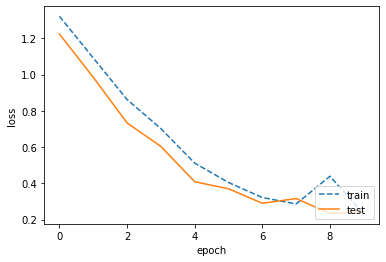

In [4]:
#Question 2
#Imports
from tensorflow.keras import models, layers, optimizers, datasets, utils
from sklearn.model_selection import train_test_split

#Preparing data
x_train, x_test, y_train, y_test = train_test_split(X.T, Y0, test_size=0.125)
x_train = x_train.reshape(700, 8)
x_test = x_test.reshape(100, 8)
y_train = utils.to_categorical(y_train, 4)
y_test = utils.to_categorical(y_test, 4)

#Creating layers
inputs = layers.Input(shape=(8,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
outputs= layers.Dense(4, activation='softmax')(x)

#Creating model
model = models.Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy',
              optimizer='Nadam', metrics=['accuracy'])

#Fitting and evaluating model
history=model.fit(x_train, y_train,
            batch_size=128,
            epochs=10,
            validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0],'Test accuracy:', score[1])

# Plotting learning curves 
plt.plot(history.history['loss'],'--')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

From questions 1 and 2 above you can see both implementations of the neural network gather very similar results with the best performance acheiving a loss value of around 0.2  
For the keras implementation I kept the epochs low (at 10) to keep speed up and printout to a minimum and increasing the epochs to 1000 doesn't gain a significant increase in accuracy.

Outcome	Probability
2	0.0
3	0.1
4	0.05
5	0.05
6	0.1
7	0.15
8	0.05
9	0.2
10	0.1
11	0.2
12	0.0


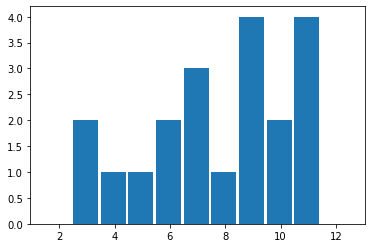

In [5]:
#Question 3.1
import random as rn

#Function that rolls two dice and returns sum of rolls
def roll():
    n1 = rn.randint(1, 6)
    n2 = rn.randint(1, 6)
    return n1 + n2

#Rolling dice
num_rolls = 20
rolls = np.zeros(num_rolls)
for i in range(num_rolls):
    rolls[i] = roll()

#Plotting
n = plt.hist(rolls, align='left', width=0.9, bins=range(2, 14))[0]

#Calculating probabilities
probs = n/num_rolls
print('Outcome\tProbability')
for i in range(len(n)):
    print(f'{i+2}\t{probs[i]}')

Outcome	Probability
2	0.021
3	0.051
4	0.075
5	0.128
6	0.156
7	0.177
8	0.122
9	0.116
10	0.074
11	0.054
12	0.026


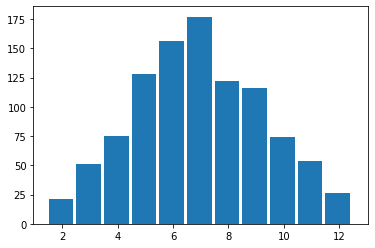

In [6]:
#Question 3.2

#Rolling dice
num_rolls = 1000
rolls = np.zeros(num_rolls)
for i in range(num_rolls):
    rolls[i] = roll()

#Plotting
n = plt.hist(rolls, align='left', width=0.9, bins=range(2, 14))[0]

#Calculating probabilities
probs = n/num_rolls
print('Outcome\tProbability')
for i in range(len(n)):
    print(f'{i+2}\t{probs[i]}')

Outcome	Probability
7	0.125
3	0.084


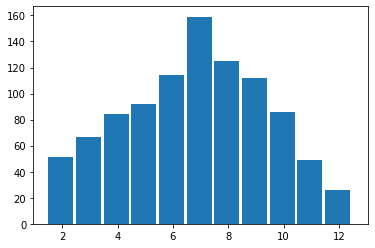

In [7]:
#Question 3.3

altered = [1, 0, 3, 4, 5, 6]

def biasRoll():
    n1 = rn.choice(altered)
    n2 = rn.randint(1, 6)
    return n1 + n2

#Rolling dice
num_rolls = 1000
rolls = np.zeros(num_rolls)
for i in range(num_rolls):
    rolls[i] = biasRoll()

#Plotting
n = plt.hist(rolls, align='left', width=0.9, bins=range(2, 14))[0]

#Calculating probabilities
probs = n/num_rolls
print('Outcome\tProbability')
print(f'{7}\t{probs[6]}')
print(f'{3}\t{probs[2]}')

In [8]:
#Question 4
import lea

brokenAlt   = lea.event(0.001)
brokenBelt = lea.event(0.02)
charging = lea.joint(brokenAlt, brokenBelt).switch({(True ,True ) : lea.event(0),
                                                    (True ,False) : lea.event(0),
                                                    (False,True ) : lea.event(0),
                                                    (False,False) : lea.event(0.995)})
batteryFlat = charging.switch({True  : lea.event(0.1),
                               False : lea.event(0.9)})
carStart = batteryFlat.switch({True  : lea.event(0),
                               False : lea.event(0.95)})    

In [9]:
#Part b
lea.P(brokenAlt.given(~carStart))

0.005496004507962573

In [10]:
#Part c
lea.P(brokenBelt.given(~carStart))

0.10992009015925147

In [11]:
#Part d
lea.P(brokenBelt.given(~carStart & brokenAlt))

0.02

In [12]:
#Part e
lea.P((brokenBelt & brokenAlt).given(~carStart))

0.00010992009015925146